In [9]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Decision Trees and Tree Based Models

Decision trees are a general class of machine learning models that are used for both classification and regression. They have even been adapted for the use of outlier detection. The trained models resemble a tree, complete with branches and nodes. The model is essentially a series of questions with yes or no answers, where the resulting tree structure contains all the combination of responses.

Tree based models are popular because they mimic human decision making process, work well for a large class of problems, naturally handle multiclassification, and handle a mix of categorical and numerical data. They are also easy to understand and explain. The transparency of a model is often called its *explicability*. Models with low explicability are often referred to as "black boxes" and are difficult to derive insight over the process they are modeling.

In this notebook, we will discuss the decision tree model and understand how they are trained and used to make predictions. Further, we will analyze several advanced machine learning models that use decision trees as a building block to create models with greater predictive power.

## Training decision tree classifiers

The best way to understand a decision tree is to construct one and visualize it. We'll train a decision tree classifier on the iris data set and visualize the tree with the `Graphviz` package. The iris data set is a famous data set of 150 observations of three different iris species: setosa, versicolor, and virginica. Each observation has measurements of the petal length and width and sepal length and width, for a total of four features.

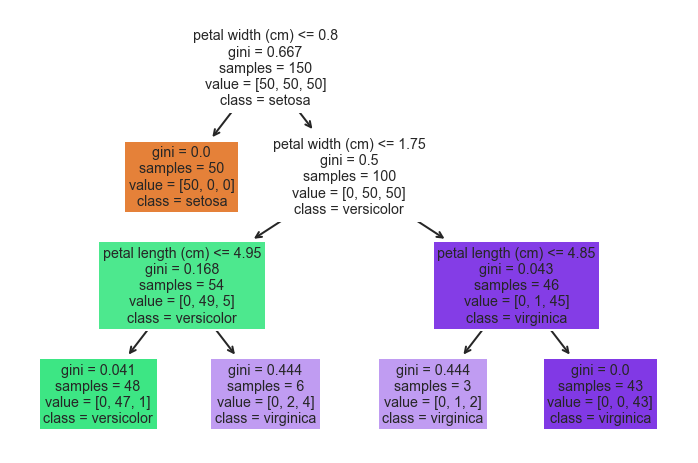

In [18]:
import graphviz
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

# load data set
data = load_iris()
X = data['data']
y = data['target']

# train decision tree
clf = DecisionTreeClassifier(max_depth=3,)
clf.fit(X, y)

# visual tree
# graphviz.Source(export_graphviz(clf, 
#                                 out_file=None,
#                                 feature_names=data['feature_names'],
#                                 class_names=data['target_names']))

tree.plot_tree(clf,
               feature_names = data.feature_names, 
               class_names=data.target_names,
               filled = True);


Note how the model resembles an upside down tree and each box represents a node in the tree. Printed in each box is

* **samples**: the number of observations in the node.
* **Gini**: a measure of node purity.
* **value**: the distribution of observations in each class.
* **class**: the most common label in the node.

At the top of the tree is the __root node__. This node is _split_ to form two branches. Observations that satisfy the criterion printed at the top of the box are moved to one branch while the rest to the other. You can view a decision tree as a model that is making partitions in a space that contains your training data. For classification, the partitions are chosen to separate the different classes while in regression, the partitions are picked to reduce the variance of sample labels. For the tree displayed above, node splits were chosen to lead to an overall reduction of the Gini metric, discussed further in the next section. The nodes that do not branch off are called __terminal nodes__ or __leaves__.

With a trained tree, predictions are made on an observation by starting at the root and following the path as a result of the criterion in each node. Once at a leaf, the predicted class is the class with the plurality. For example, if an observation has a petal length of 2.5 cm and a petal width of 1 cm, it will reside in the left most leaf in the figure. Since there were 47 training observations of class versicolor and 1 of virginica that resided in the leaf, any observation landing in this leaf will be predicted as versicolor.

Our trained tree model only makes splits using two features, the petal length and width, making it easy to visualize our model. The interactive figure below lets you control the splitting process described above for the iris data set. 

### Gini impurity

For classification, decision trees use the Gini impurity metric, a measure of node impurity. The Gini impurity is equal to the probability of misclassifying an observation if it were randomly labeled based on the distribution of labels of the node. The decision tree will perform node splits that result in reducing the Gini metric. The equation for the Gini impurity for node $m$ is

$$ G_m = \sum_k p_{mk} (1 - p_{mk}), $$

where $p_{mk}$ is the fraction of observations of class $k$ in node $m$. Consider two cases where a node has 10 observations belonging to two classes. In the first case, each class has equal representation in the node, [5, 5]. In the second, only the first class is present, [10, 0]. The Gini impurity for both cases are

* Case 1: [5, 5]
$$ G = \frac{5}{10} \left(1 - \frac{5}{10}\right) + \frac{5}{10} \left(1 - \frac{5}{10}\right) = 0.5 $$
* Case 2: [10, 0]
$$ G = \frac{10}{10} \left(1 - \frac{10}{10}\right) + \frac{0}{10} \left(1 - \frac{0}{10}\right) = 0 $$

The greater the node purity, the lower the Gini metric. See the plot below of how Gini varies with $p_{mk}$ when there are two classes.

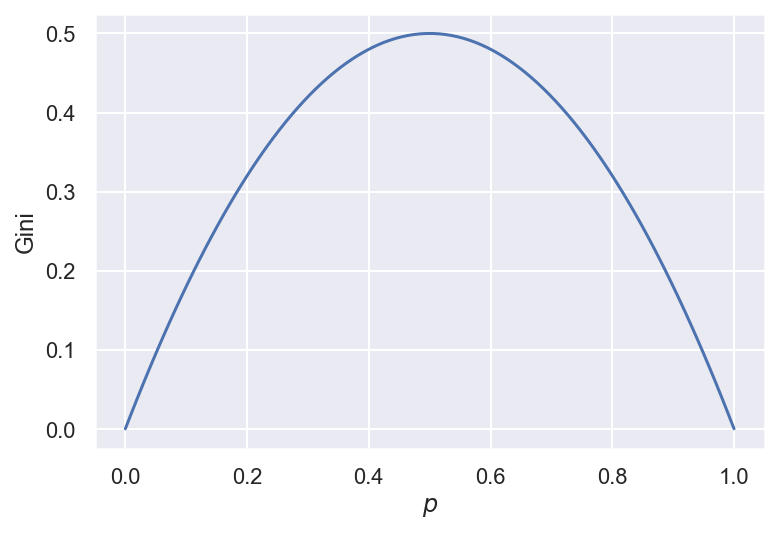

In [19]:
p = np.linspace(1E-6, 1-1E-6, 100)
gini = p*(1-p) + (1-p)*p

plt.plot(p, gini)
plt.xlabel('$p$')
plt.ylabel('Gini');

## Tree training algorithm

There are several algorithms available to determine node splits in decision trees. `scikit-learn` uses the   Classification And Regression Tree (CART) algorithm. The steps in the algorithm are

1. For each feature $p$, construct _thresholds_ $t_{pi}$. An example of a threshold for a feature is petal width $\leq$ 0.8 cm.
1. Choose the threshold that results in the greatest reduction of the _weighted_ error metric. For example, using the criterion petal width $\leq$ 0.8 cm leads to the greatest drop in overall Gini impurity from the resulting two new nodes.
1. Split the data set into two sets, nodes, using the chosen threshold.
1. Repeat the process on the _child_ nodes until a termination criterion is met.

The node splitting process is _greedy_, the model chooses the split point that will result in the greatest reduction of the loss metric at the moment. Greedy algorithms are those that make the locally optimal choice. They do not consider making suboptimal choices that may setup an overall better choice in later iterations. Greedy algorithms may not always converge to the global minimum but will often have better time complexities than algorithms that may result in a more optimal solution. The choice of a greedy algorithm for decision trees is an example of trading some model performance, ideally a small amount, for a gain in faster computation.

## Decision Tree Hyperparameters

As you have seen before, the `max_depth` is a key hyperparameter for decision trees. It controls how deep the tree is allowed to grow, thus, how adaptive the model is to fit the training data. As the depth gets greater, the model gets more complex, and has a higher propensity for large variance error. The `max_depth` isn't the only hyperparameter you can tune; several others are

<table>
	<tr>
    <th>Hyperparameter</th>
    <th>Description</th>
	</tr>

    <tr>
    <td>`max_depth`</td>
    <td>The maximum depth of the tree </td>
	</tr>
	
    <tr>
    <td>`max_features`</td>
    <td>The number of features to consider when deciding the best split</td>
	</tr>

	<tr>
    <td>`min_samples_split`</td>
    <td>Minimum number of samples required to consider a split on an internal node</td>
	</tr>

	<tr>
    <td>`min_samples_leaf`</td>
    <td>Minimum number of samples required for a leaf (terminal node)</td>
	</tr>
</table>

As with any machine learning model, it is important to understand how the hyperparameters controls the model's bias and variance error. The best way to analyze a hyperparameter's affect on a model is to consider whether it increases or decreases the model's ability to adapt to the training data. As always, `scikit-learn` has extensive documentation that details all of the hyperparameters available and their meaning.

**Question**
* For each hyperparameter, how does it affect a model's bias and variance error?

**Question**
* For decision trees, there is no need to scale your data. Why is this?

## Ensemble models

Ensemble models are machine learning models that use more than one predictor to arrive at a prediction. A group of predictors form an _ensemble_. In general, ensemble models perform better than using a single predictor. There are three types of ensemble models, bagging, boosting, and blending. Of the three, decision trees have been used to construct bagging and boosting based models.

### Random forests

The performance of a single decision tree will be limited. Instead of relying on one tree, a better approach is to aggregate the predictions of multiple tree. On average, aggregation will perform better than a single predictor. You can envision the aggregation as mimicking the idea of "wisdom of the crowd". We call a tree based model that aggregates the predictions of multiple trees a __random forest__.

In order for a random forest to be effective, the model needs a diverse collection of trees. There should be variations in the chosen thresholds for splitting and the number of nodes and branches. There is no point in aggregating the predicted results if all the trees are nearly identical and produce the same result. There is no "wisdom of the crowd" if everyone thinks alike. To achieve a diverse set of trees, we need to:

1. Train each tree in the forest using a different training set.
1. Only consider a subset of features when deciding how to split the nodes.

For the first point, ideally we would generate a new training set for each tree. However, often times it's too difficult or expensive to collect more data; we have to make due with what we have. Bootstrapping is a general statistical technique to generate "new" data sets with a single set by random sampling with _replacement_. Sampling with replacement allows for a data point to be sampled more than once.

Typically, when training the standard decision tree model, the algorithm will consider all features in deciding the node split. Considering only a subset of your features ensures that your trees do not resemble each other. If the algorithm had considered all features, a dominant feature would be continuously chosen for node splits.

The hyperparameters available for random forests include those of decision tress with some additions.

<table>
	<tr>
    <th>Hyperparameter</th>
    <th>Description</th>
	</tr>

	<tr>
    <td>`n_estimators`</td>
    <td>The number of trees in the forest</td>
	</tr>

	<tr>
    <td>`n_jobs`</td>
    <td>The number of jobs to run in parallel when fitting and predicting</td>
	</tr>
</table>

Since the random forest is based on idea of bootstrapping and aggregating the results, it is referred to as a *bagging* ensemble model.

**Question**
* Are there any other advantages of considering a subset of the features?

## Feature importance

Decision trees have the capability to evaluate feature importance. The feature importance score is based on two metrics:

* How many times a particularly feature was selected to split a node
* The depth where the feature was selected to split the node

If a feature is chosen numerous times to make a node split, then it is a feature that is useful in dividing/partitioning the training data. The second metric considers the impact of choosing a feature for a node split. For example, the feature chosen to perform the initial split of the entire data set will have a greater impact on the structure of the tree than node splits deeper in the tree. You can think of earlier decisions as working on higher level attributes while decisions deeper in the tree work to distinguish smaller scale features. The described metrics are combined with the decrease in error metric from a split to derived a normalized feature importance score. For ensemble models, the feature importance is averaged across all trees.

As with other models, feature importance of a trained model is obtained with `feature_importances_` attribute. Let's derive the relative feature importances for the iris data set using a random forest.

Fitting 3 folds for each of 40 candidates, totalling 120 fits


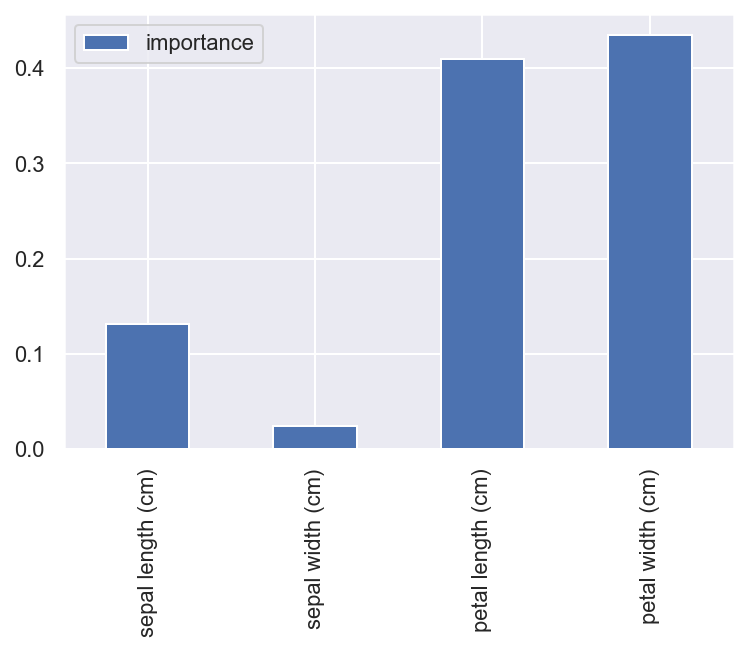

In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# load data set
data = load_iris()
X = data['data']
y = data['target']
feature_names = data['feature_names']

# tune random forest
tree = RandomForestClassifier(n_estimators=20, random_state=0)
param_grid = {'max_depth': range(2, 10), 'min_samples_split': [2, 4, 6, 8, 10]}
grid_search = GridSearchCV(tree, param_grid, cv=3, n_jobs=2, verbose=1)
grid_search.fit(X, y)
best_model = grid_search.best_estimator_

# plot feature importance
df = pd.DataFrame({'importance': best_model.feature_importances_}, index=feature_names)
df.plot.bar();